<a href="https://colab.research.google.com/github/elichen/rl-snake/blob/main/RL_snake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q pygame

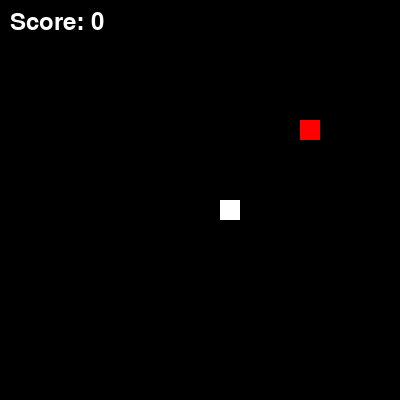

In [39]:
import pygame
import random
import numpy as np
import imageio
import io
from IPython.display import Image, display

# Initialize Pygame
pygame.init()

# Set up the game window
width, height = 400, 400
grid_size = 20
grid_width = width // grid_size
grid_height = height // grid_size
window = pygame.display.set_mode((width, height))
pygame.display.set_caption("Snake Game")

# Define colors
black = (0, 0, 0)
white = (255, 255, 255)
red = (255, 0, 0)

# Define game variables
snake_speed = 10
clock = pygame.time.Clock()

# Initialize the snake
snake_x = grid_width // 2
snake_y = grid_height // 2
snake_dx = 0
snake_dy = 0
snake_body = [(snake_x, snake_y)]

# Initialize the food
food_x = random.randint(0, grid_width - 1)
food_y = random.randint(0, grid_height - 1)

# Initialize the score
score = 0

# Simple heuristic controller
def get_direction(snake_x, snake_y, food_x, food_y):
    if abs(snake_x - food_x) > abs(snake_y - food_y):
        if snake_x > food_x:
            return -1, 0
        else:
            return 1, 0
    else:
        if snake_y > food_y:
            return 0, -1
        else:
            return 0, 1

# Check if the food position overlaps with the snake's body
def is_food_overlapping_snake(food_x, food_y, snake_body):
    return (food_x, food_y) in snake_body

# Game loop
frames = []
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Move the snake
    snake_dx, snake_dy = get_direction(snake_x, snake_y, food_x, food_y)
    snake_x += snake_dx
    snake_y += snake_dy
    snake_body.append((snake_x, snake_y))

    # Check for collision with the food
    if snake_x == food_x and snake_y == food_y:
        score += 1
        while True:
            food_x = random.randint(0, grid_width - 1)
            food_y = random.randint(0, grid_height - 1)
            if not is_food_overlapping_snake(food_x, food_y, snake_body):
                break
    else:
        snake_body.pop(0)

    # Check for collision with the boundaries
    if snake_x < 0 or snake_x >= grid_width or snake_y < 0 or snake_y >= grid_height:
        running = False

    # Check for collision with itself
    if len(snake_body) > 1 and (snake_x, snake_y) in snake_body[:-1]:
        running = False

    # Clear the window
    window.fill(black)

    # Draw the snake
    for body_part in snake_body:
        pygame.draw.rect(window, white, [body_part[0] * grid_size, body_part[1] * grid_size, grid_size, grid_size])

    # Draw the food
    pygame.draw.rect(window, red, [food_x * grid_size, food_y * grid_size, grid_size, grid_size])

    # Draw the score
    font = pygame.font.Font(None, 36)
    score_text = font.render("Score: " + str(score), True, white)
    window.blit(score_text, (10, 10))

    # Update the display
    pygame.display.update()

    # Capture the frame as an image
    frame = pygame.surfarray.array3d(pygame.display.get_surface())
    frame = np.swapaxes(frame, 0, 1)

    # Set aspect ratio to 1:1
    aspect_ratio = frame.shape[1] / frame.shape[0]
    if aspect_ratio != 1:
        target_width = frame.shape[0]
        target_height = int(target_width * aspect_ratio)
        frame = frame[:target_height, :target_width]

    frames.append(frame)

    clock.tick(snake_speed)

# Save the frames as an animated GIF
gif_data = io.BytesIO()
writer = imageio.get_writer(gif_data, format='GIF', duration=1/snake_speed)
for frame in frames:
    writer.append_data(frame)
writer.close()
gif_data.seek(0)

# Display the animated GIF in the notebook
display(Image(data=gif_data.getvalue(), format='gif'))

pygame.quit()